In [13]:
import pandas as pd
import numpy as np
import os
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from fancyimpute import KNN,SoftImpute
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

%matplotlib inline 

In [14]:
data = pd.read_csv('../Data/Processed.csv')
data.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Status
0,12232.0,0.0,728.0,0.0,0.0,46643.0,0.0,777.39,18.0,10.000000,12.0,0.0,82.231381,7946.0,0.0,0.0,Loan Refused
1,25014.0,1.0,733.0,1.0,1.0,81099.0,0.0,892.09,26.7,45.346829,14.0,0.0,188.960313,77961.0,0.0,0.0,Loan Refused
2,16117.0,0.0,724.0,2.0,1.0,60438.0,1.0,1244.02,16.7,32.000000,11.0,1.0,106.183803,14815.0,1.0,0.0,Loan Refused
3,11716.0,0.0,740.0,3.0,0.0,34171.0,0.0,990.94,10.0,21.443697,21.0,0.0,83.719771,43533.0,0.0,0.0,Loan Refused
4,9789.0,1.0,686.0,1.0,1.0,47003.0,1.0,503.71,16.7,25.000000,13.0,1.0,130.049990,19553.0,1.0,0.0,Loan Refused


In [38]:
X = data.drop('Loan_Status', axis = 1)
X.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Home Ownership', 'Annual Income', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [26]:
y = data['Loan_Status']

In [27]:
#Binarizing the Target variable
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(y)
y=lb_results
y=y.ravel()

In [28]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [29]:
#Scaling the independent variables
X_scaled = preprocessing.scale(X)
print(X_scaled)
print('   ')
print(X_scaled.shape)

[[-0.1869176  -0.57302977  0.06886311 ... -0.79845518 -0.32295035
  -0.10958408]
 [ 1.48349848  1.74511004  0.26644983 ...  1.83825771 -0.32295035
  -0.10958408]
 [ 0.32079375 -0.57302977 -0.08920626 ... -0.53977375  2.39304617
  -0.10958408]
 ...
 [ 1.40247376 -0.57302977  0.78017528 ...  0.91232955 -0.32295035
  -0.10958408]
 [-1.1281112  -0.57302977 -0.16824094 ... -0.4039368  -0.32295035
  -0.10958408]
 [ 0.62515919 -0.57302977 -0.32631031 ... -0.30218149 -0.32295035
   3.77361205]]
   
(88910, 16)


###### Modeling

In [39]:
def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    '''print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))'''
    
    return est, y1, y2[:, 1]

In [40]:
#Function to find which features are more important than others through model
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(X.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x

[0.17002583 0.20643398 0.1589793  0.03105741 0.0480587  0.04529388
 0.03465256 0.03284825 0.03125504 0.0306889  0.02955444 0.02961203
 0.03400204 0.03824425 0.03748068 0.04181264]


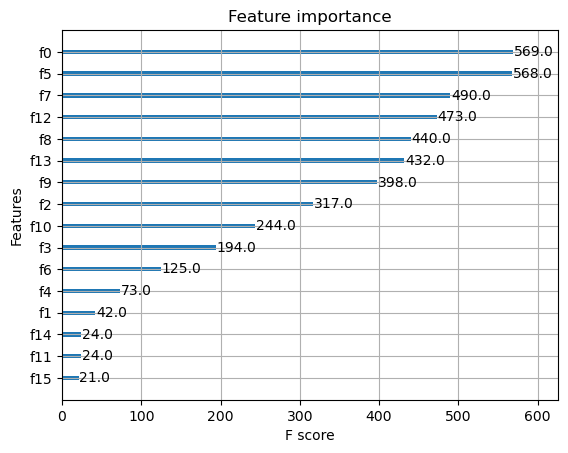

In [41]:
#######Looking at other models using different classifiers
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)

#Finding accuracy and feature importance using XGB classifier
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)


print(xgb0.feature_importances_)
plot_importance(xgb0)
pyplot.show()
feat1 = feat_importance(xgb0)

In [42]:
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = metrics.confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix, plt

computing GradientBoosting - Non-balanced 


C:\Users\amr_a\AppData\Local\Temp\ipykernel_1416\958053151.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)
C:\Users\amr_a\AppData\Local\Temp\ipykernel_1416\958053151.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 


C:\Users\amr_a\AppData\Local\Temp\ipykernel_1416\958053151.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


computing XGBClassifier - Non-balanced 


C:\Users\amr_a\AppData\Local\Temp\ipykernel_1416\958053151.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


(                    model  matthews_corrcoef  roc_auc_score  precision_score  \
 0        GradientBoosting           0.252295       0.748998         0.589744   
 1      LogisticRegression           0.164488       0.672479         0.566704   
 2  RandomForestClassifier           0.170297       0.689746         0.484476   
 3           XGBClassifier           0.243881       0.739014         0.548967   
 
    recall_score  f1_score    model_type  
 0      0.257150  0.358139  Non-balanced  
 1      0.131435  0.213381  Non-balanced  
 2      0.225169  0.307447  Non-balanced  
 3      0.290042  0.379551  Non-balanced  ,
 {'GradientBoosting': array([[17605,  1376],
         [ 5714,  1978]], dtype=int64),
  'LogisticRegression': array([[18208,   773],
         [ 6681,  1011]], dtype=int64),
  'RandomForestClassifier': array([[17138,  1843],
         [ 5960,  1732]], dtype=int64),
  'XGBClassifier': array([[17148,  1833],
         [ 5461,  2231]], dtype=int64)},
 <module 'matplotlib.pyplot' fr

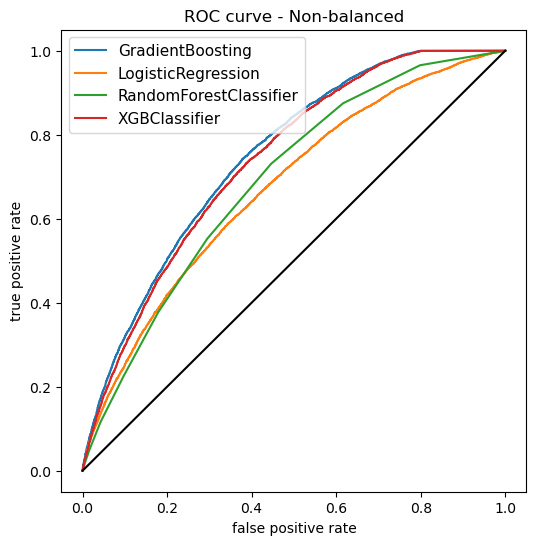

In [43]:
run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')